## Tomato Leaf Disease Classification using CNN -  MobileNetV2 - Transfer Learning based approach.



Name: Sartaj Sudheer Babu

---


Student ID: 220684636

Loading and evaluating the model

In [ ]:
!7z x Tomato_Test.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 57600224 bytes (55 MiB)

Extracting archive: Tomato_Test.zip
--
Path = Tomato_Test.zip
Type = zip
Physical Size = 57600224

  0%     20% 762 - test_tflite/Tomato___healthy/image (1580).JPG                                                         40% 1497 - test_tflite/Tomato___Leaf_Mold/image (864).JPG                                                           62% 2190 - test_tflite/Tomato___Spider_mite . tted_spider_mite/image (897).JPG

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/model-96.h5')


Loading the Test Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory('/content/test_tflite',
                                                  target_size=(224,224),
                                                  batch_size=16,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 3640 images belonging to 10 classes.


In [ ]:
import numpy as np
y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

228/228 [==============================] - 11s 44ms/step


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 423    0    0    0    3    0    0    0    0    0]
 [   4  192    1    0    2    1    0    0    0    0]
 [   0   19  361    1    0    0    0    1    0    1]
 [   0    0    2  184    2    3    0    0    0    0]
 [   0    3    0    0  352    0    0    0    0    0]
 [   0    0    0    0    0  333    3    0    0    0]
 [   0    4    0    0    1    6  271    0    0    0]
 [   0    0    0    0    0    3    0 1069    0    0]
 [   0    0    0    0    0    0    0    0   76    0]
 [   0    0    0    0    0    0    0    0    0  319]]


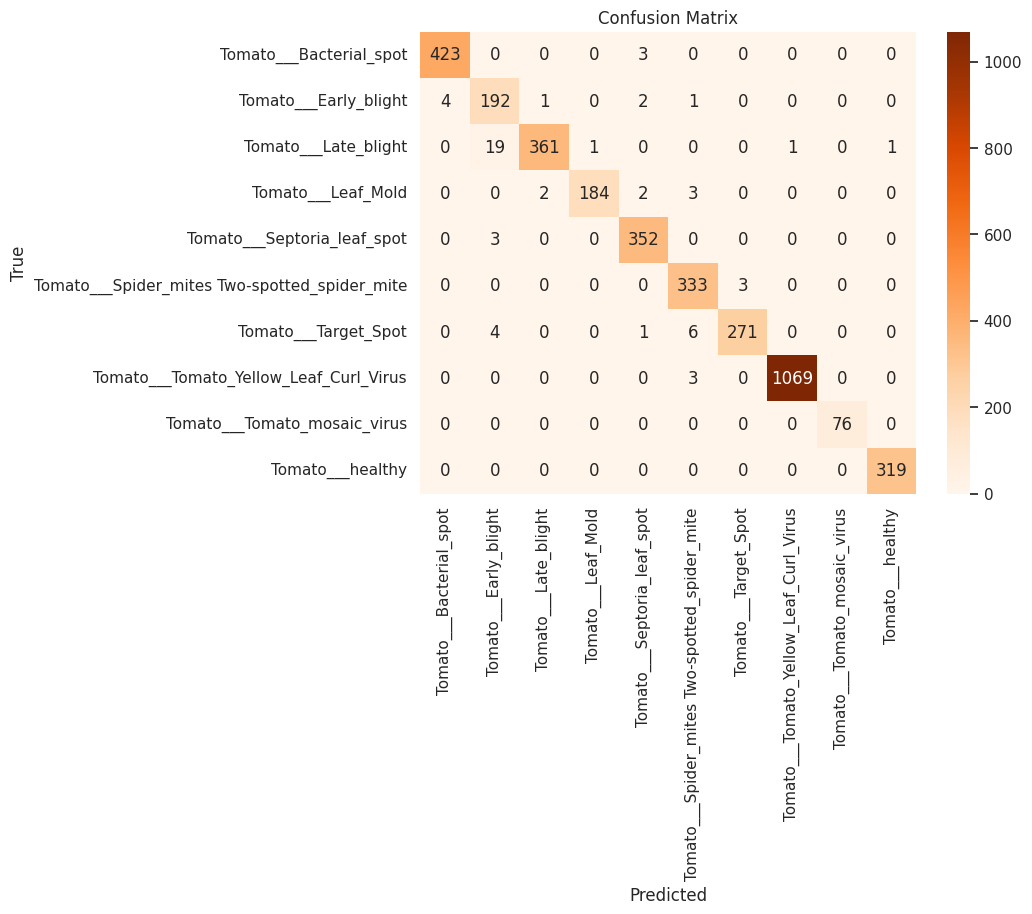

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)
class_names = sorted(test_generator.class_indices.keys())

# Plot confusion matrix using seaborn with an orange theme
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid", palette="Oranges")
sns.heatmap(cm, annot=True, cmap="Oranges", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')


In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9835164835164835
Precision: 0.984166931068134
Recall: 0.9835164835164835
F1-score: 0.9836286680219102


In [ ]:
import os
class_names = sorted(os.listdir('/content/test_tflite'))

In [ ]:
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print('Classification Report:')
print(class_report)

# Calculate sample size for each class
sample_size = [len(os.listdir(os.path.join('/content/test_tflite', class_name))) for class_name in class_names]

# Print sample size for each class
print('Sample Size for Each Class:')
for class_name, size in zip(class_names, sample_size):
    print(f'{class_name}: {size}')

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      0.99      0.99       426
                        Tomato___Early_blight       0.88      0.96      0.92       200
                         Tomato___Late_blight       0.99      0.94      0.97       383
                           Tomato___Leaf_Mold       0.99      0.96      0.98       191
                  Tomato___Septoria_leaf_spot       0.98      0.99      0.98       355
Tomato___Spider_mites Two-spotted_spider_mite       0.96      0.99      0.98       336
                         Tomato___Target_Spot       0.99      0.96      0.97       282
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      1.00      1.00      1072
                 Tomato___Tomato_mosaic_virus       1.00      1.00      1.00        76
                             Tomato___healthy       1.00      1.00      1.00       319

                  